In [151]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [152]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [153]:
test_data = pd.read_csv('./titanic/test.csv')
train_data = pd.read_csv('./titanic/train.csv')



In [154]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
# Drop unnecessary columns only
test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
labels = train_data['Survived']
train_data.drop(['Survived'], axis=1, inplace=True)

In [156]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [157]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])


/var/folders/xk/dk_8xcq91w902vjjj8bl0jvm0000gn/T/ipykernel_9316/2485461781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/xk/dk_8xcq91w902vjjj8bl0jvm0000gn/T/ipykernel_9316/2485461781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [158]:
for dataset in [train_data, test_data]:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [159]:
label_encoder = preprocessing.LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])


In [160]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.0,7.2500,False,False,True,2
1,1,0,38.0,71.2833,True,False,False,2
2,3,0,26.0,7.9250,False,False,True,1
3,1,0,35.0,53.1000,False,False,True,2
4,3,1,35.0,8.0500,False,False,True,1


In [161]:
scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [162]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/miniconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])


In [164]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [165]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [166]:
model.fit(train_data, labels, epochs=500, validation_split=0.2, callbacks=[callback])

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7164 - loss: 0.6520 - val_accuracy: 0.8101 - val_loss: 0.6144
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7621 - loss: 0.5010 - val_accuracy: 0.8380 - val_loss: 0.5895
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7854 - loss: 0.4576 - val_accuracy: 0.8492 - val_loss: 0.5654
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8199 - loss: 0.4086 - val_accuracy: 0.8436 - val_loss: 0.5306
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8312 - loss: 0.3907 - val_accuracy: 0.8492 - val_loss: 0.5115
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8122 - loss: 0.4385 - val_accuracy: 0.8268 - val_loss: 0.5036
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8468 - loss: 0.3802 - val_accuracy: 0.8492 - val_loss: 0.4744
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8494 - loss: 0.3863 - val_accuracy: 0.

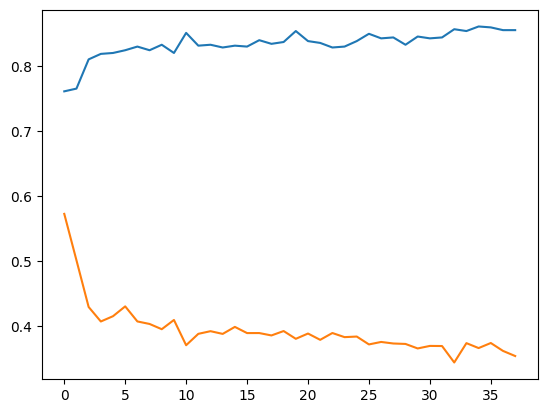

In [167]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])

plt.show()

In [168]:
tstarray = model.predict(test_data)

for i in range(len(tstarray)):
    if tstarray[i] >= 0.5:
        tstarray[i] = 1
    else:
        tstarray[i] = 0

tstarray = tstarray.flatten()

tstarray = tstarray.astype(int)
submission = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': tstarray})
submission.to_csv('submission.csv', index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [169]:
keyPath = pd.read_csv('asnwer.csv')

keyLabels = keyPath['Survived']

In [170]:
model.save('titanic_model.h5')

In [171]:
model.evaluate(test_data, keyLabels)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7424 - loss: 0.5550


[0.5184040069580078, 0.7655502557754517]